In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, Dropout, MaxPool2D , Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
!wget https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
!wget https://www.dropbox.com/s/i37jfni3d29raoc/test_set.zip

--2021-03-12 02:13:11--  https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/t4pzwpvrzneb190/training_set.zip [following]
--2021-03-12 02:13:11--  https://www.dropbox.com/s/raw/t4pzwpvrzneb190/training_set.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8a13524469a729619ee1a27c27.dl.dropboxusercontent.com/cd/0/inline/BKgA8QP5iAxCc8HrRxxaecF4Gmf2NRV0kfbtk0vRw4QFWxlmI0p5pSVb4XO8T6tJ088-TeI7aWEFdOr1pbrcgit2u3yDBXcL9Kd1TMwhNk10kxauU4HfZBUWnCJ0SQQ4qmwJ5fcv_D55nSe6qw1ohGyQ/file# [following]
--2021-03-12 02:13:11--  https://uc8a13524469a729619ee1a27c27.dl.dropboxusercontent.com/cd/0/inline/BKgA8QP5iAxCc8HrRxxaecF4Gmf2NRV0kfbtk0vRw4QFWxlmI0p5pSVb4XO8T6tJ088-TeI7aWEFdO

In [ ]:
!unzip test_set.zip
!unzip training_set.zip

Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  inflating: training_set/training_set/cats/cat.3719.jpg  
  inflating: training_set/training_set/cats/cat.372.jpg  
  inflating: training_set/training_set/cats/cat.3720.jpg  
  infla

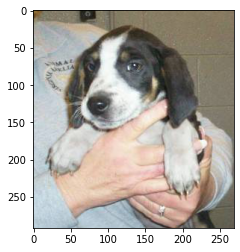

In [ ]:
im = mpimg.imread("training_set/training_set/dogs/dog.10.jpg")
plt.imshow(im)

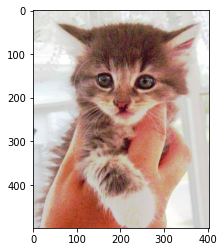

In [ ]:
im1 = mpimg.imread("training_set/training_set/cats/cat.100.jpg")
plt.imshow(im1)

In [ ]:
img_width, img_height = 150,150  #width and height of the images
train_data_dir = r"training_set/training_set"
validation_data_dir=r"test_set/test_set"
nb_train_sample =100
nb_validation_samples =100
epochs =20
batch_size= 20

In [ ]:
import tensorflow.keras.backend as k
if k.image_data_format == 'channels_first':
  input_shape = (3,img_width,img_height)
else:
  input_shape = (img_width,img_height,3)

In [ ]:
train_datagen = ImageDataGenerator(rescale=1. /255,shear_range =0.2,zoom_range=0.2,horizontal_flip =True)
test_datagen = ImageDataGenerator(rescale=1. /255)
train_generator =train_datagen.flow_from_directory(train_data_dir,target_size =(img_width,img_height), batch_size=batch_size,class_mode='binary',classes=['cats','dogs'])
#Now this, will generate training generator data
#Target_size = mentioned image_width and image_height
#Batch_size = 20 (already mentioned)
#Class_mode = binary(because here only two classes are there to classify)


validation_generator =test_datagen.flow_from_directory(validation_data_dir,target_size =(img_width,img_height), batch_size=batch_size,class_mode='binary')
#Now, this will generate testing generator data
#Target_size = mentioned image_width and image_height
#Batch_size = 20 (already mentioned)
#Class_mode = binary(because here only two classes are there to classify)


Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


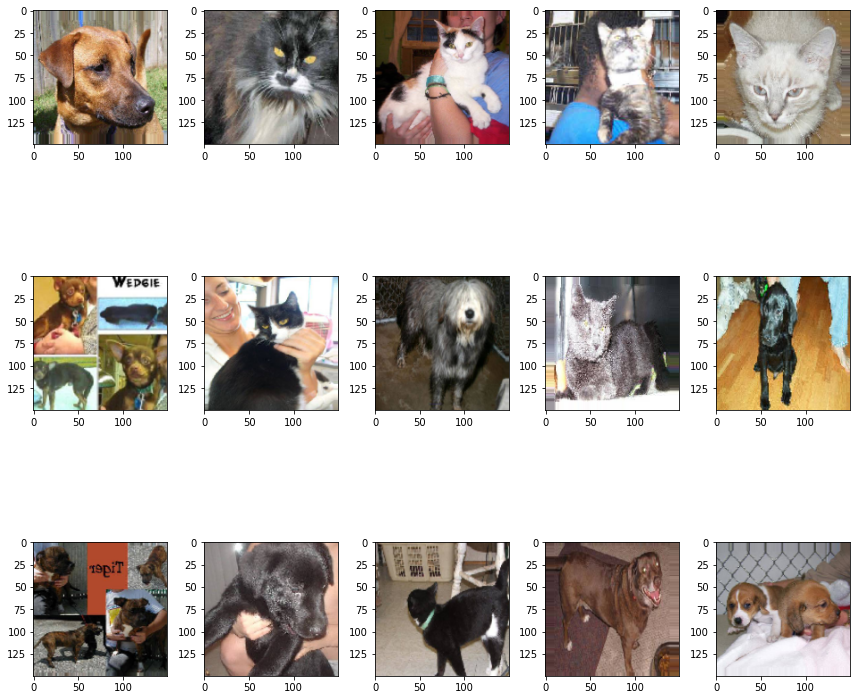

In [ ]:
plt.figure(figsize=(12,12))
for i in range(0, 15):
  plt.subplot(3,5, i + 1)
  for X_batch, Y_batch in train_generator:
    plt.imshow(X_batch[0])
    break
plt.tight_layout()
plt.show()

In [ ]:
print(input_shape)

(150, 150, 3)


In [ ]:
model0 = Sequential()
model0.add(Conv2D(128,(3,3),input_shape=input_shape))
model0.add(Activation('relu'))
model0.add(Conv2D(128,(3,3)))
model0.add(Activation('relu'))
model0.add(MaxPool2D(pool_size=(2,2)))
model0.add(Conv2D(128,(3,3)))
model0.add(Activation('relu'))
model0.add(MaxPool2D(pool_size=(2,2)))
model0.add(Flatten())
model0.add(Dense(1))
model0.add(Activation('sigmoid')) #sigmoid activation function0

In [ ]:
model0.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 128)     3584      
_________________________________________________________________
activation (Activation)      (None, 148, 148, 128)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 128)     147584    
_________________________________________________________________
activation_1 (Activation)    (None, 146, 146, 128)     0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 128)       147584    
_________________________________________________________________
activation_2 (Activation)    (None, 71, 71, 128)       0

In [ ]:
model0.compile(optimizer="SGD",loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
model0.fit_generator(train_generator,
                   steps_per_epoch=nb_train_sample,epochs=epochs,
                   validation_data=validation_generator,
                       validation_steps=nb_validation_samples)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
100/100 [==============================] - 57s 227ms/step - loss: 0.7018 - accuracy: 0.5103 - val_loss: 0.6858 - val_accuracy: 0.5795
Epoch 2/20
100/100 [==============================] - 22s 223ms/step - loss: 0.6893 - accuracy: 0.5452 - val_loss: 0.6798 - val_accuracy: 0.6005
Epoch 3/20
100/100 [==============================] - 22s 224ms/step - loss: 0.6818 - accuracy: 0.5578 - val_loss: 0.6731 - val_accuracy: 0.5810
Epoch 4/20
100/100 [==============================] - 22s 225ms/step - loss: 0.6813 - accuracy: 0.5563 - val_loss: 0.6681 - val_accuracy: 0.6095
Epoch 5/20
100/100 [==============================] - 23s 233ms/step - loss: 0.6789 - accuracy: 0.5808 - val_loss: 0.6682 - val_accuracy: 0.5660
Epoch 6/20
100/100 [==============================] - 22s 225ms/step - loss: 0.6705 - accuracy: 0.5899 - val_loss: 0.6604 - val_accuracy: 0.5885
Epoch 7/20
100/100 [==============================] - 22s 224ms/step - loss: 0.6630 - accuracy: 0.6054 - val_loss: 0.6568 - val_ac

DOG


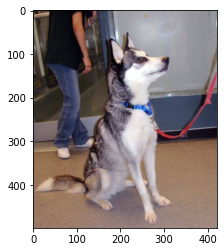

In [ ]:
import numpy as np
img_pred = image.load_img("/content/test_set/test_set/dogs/dog.4001.jpg",target_size=(150,150))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred,axis=0)
rslt = model0.predict(img_pred)
if (rslt[0][0] == 1.0):
  print("DOG")
else:
  print("CAT")
im = mpimg.imread("/content/test_set/test_set/dogs/dog.4001.jpg")
plt.imshow(im)


CAT


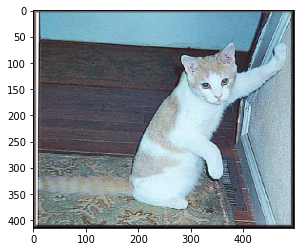

In [ ]:
import numpy as np
img_pred = image.load_img("/content/test_set/test_set/cats/cat.4001.jpg",target_size=(150,150))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred,axis=0)
rslt = model0.predict(img_pred)
if (rslt[0][0] == 1.0):
  print("DOG")
else:
  print("CAT")
im = mpimg.imread("/content/test_set/test_set/cats/cat.4001.jpg")
plt.imshow(im)

Write up a summary explaining how your program works.

1.   Import all the required libraries
2. Load the Dataset
3. Visualize the data
4. Initialize model parameters which is equivalent to design the model
5. Preprocess the Dataset resizing all the images to same size(ImageDataGenerator and flow_from_directory)
6. Define model
7. Add Layers
8. Compile model
9. fit_generator model
10. Evaluate and predict the model accuracy


